# Bit-loss Based Markovian Model for steady state throughput of CUBIC and Hybla

In this notebook, we investigate the adapted bit-based model for CUBIC and Hybla.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from ccaModels import CCA_MarkovChain_CUBIC_bit, CCA_MarkovChain_Hybla_bit

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
err_rates = np.logspace(-8,-1,35)*(1500*8)
RTTs = [0.01,0.05,0.5,1]
throughputs = np.zeros([len(RTTs),len(err_rates),4])

for k,R in enumerate(RTTs):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_bit(packet_err=l,beta=0.7 ,N=130, C = 50, RTT_real=R, RTT0=0.05, MTU=1000)
        cubic = CCA_MarkovChain_CUBIC_bit(packet_err=l,beta=0.7,N=130,C = 50, RTT_real=R, MTU = 1000)
        throughputs[k,i,0] = wireless.avg_throughput()
        throughputs[k,i,1] = cubic.avg_throughput()
    throughputs[k,:,2] = throughputs[k,:,0]*wireless.W
    throughputs[k,:,3] = throughputs[k,:,1]*cubic.W

[1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


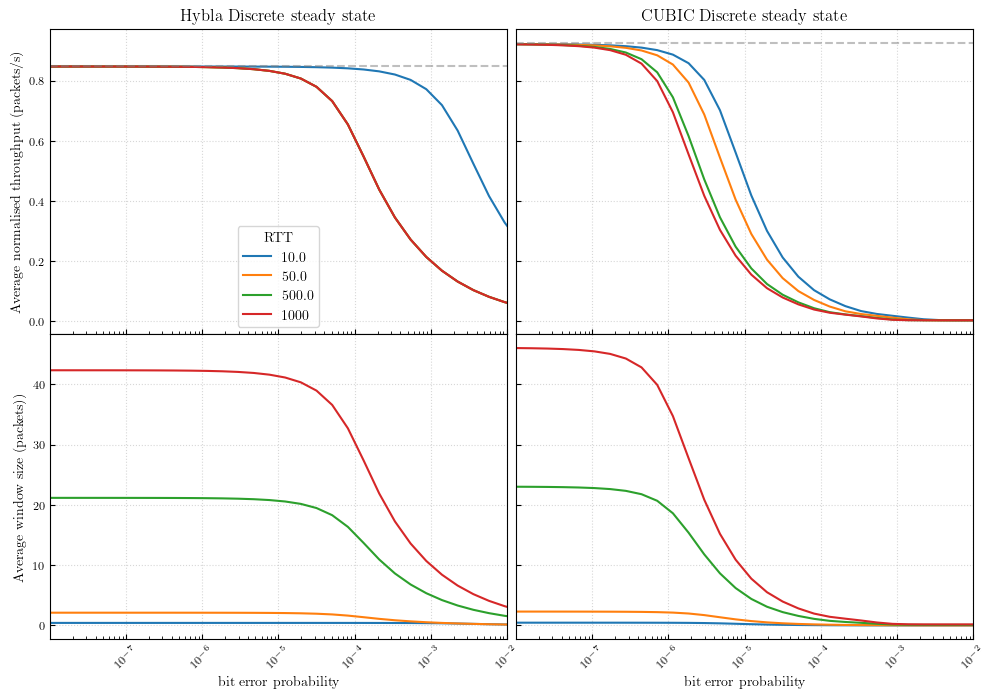

In [14]:
plt.rcParams.update({'text.usetex': True, "font.family": "Computer Modern Roman"})
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

fig, axs = plt.subplots(2, 2, figsize=(10,7),sharex=True, sharey="row")
for k,R in enumerate(RTTs):
    axs[0,0].plot(err_rates/(1500*8),throughputs[k,:,0], label = f"{R*1000}")
    axs[0,1].plot(err_rates/(1500*8),throughputs[k,:,1], label = f"{R*1000}")
    axs[1,0].plot(err_rates/(1500*8),throughputs[k,:,2], label = f"{R*1000}")
    axs[1,1].plot(err_rates/(1500*8),throughputs[k,:,3], label = f"{R*1000}")
axs[0,0].semilogx()
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r"Hybla Discrete steady state")
axs[0,0].set_ylabel(r'Average normalised throughput (packets/s)')
axs[0,1].semilogx()
axs[0,1].grid()
axs[0,1].set_title(r"CUBIC Discrete steady state")
axs[1,0].semilogx()
axs[1,0].grid()
axs[1,0].set_xlabel(r"bit error probability")
axs[1,0].set_ylabel(r'Average window size (packets))')
axs[1,1].semilogx()
axs[1,1].grid()
axs[1,1].set_xlabel(r"bit error probability")
axs[0,0].legend(title="RTT",loc='lower center', markerscale=0.6, ncols=1)
#fig.suptitle("Comparing Hybla and CUBIC")
fig.tight_layout()
for i in range(2):
    for j in range(2):
        if i==1 and j==0:
            og_labels = axs[i,j].get_xticks()
            print(og_labels)
            axs[i,j].set_xticks(og_labels[2:])
        axs[i,j].tick_params(axis='x', which='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':', rotation=45)
        axs[i,j].tick_params(axis='y', which='both', direction='in',labelsize="small", grid_alpha=0.5, grid_linestyle=':')
        axs[i,j].set_xlim(np.array([1e-8,1e-2]))

axs[0,0].hlines(1.7/2,1e-8,1e-1,linestyle='--',color='gray', alpha = 0.5)
axs[0,1].hlines(3.7/4,1e-8,1e-1,linestyle='--',color='gray', alpha = 0.5)
fig.subplots_adjust(wspace=0.02, hspace=0)
plt.savefig('figures/model_results/hyblaAndCubicmodels.png', bbox_inches='tight', dpi=400)
plt.show()

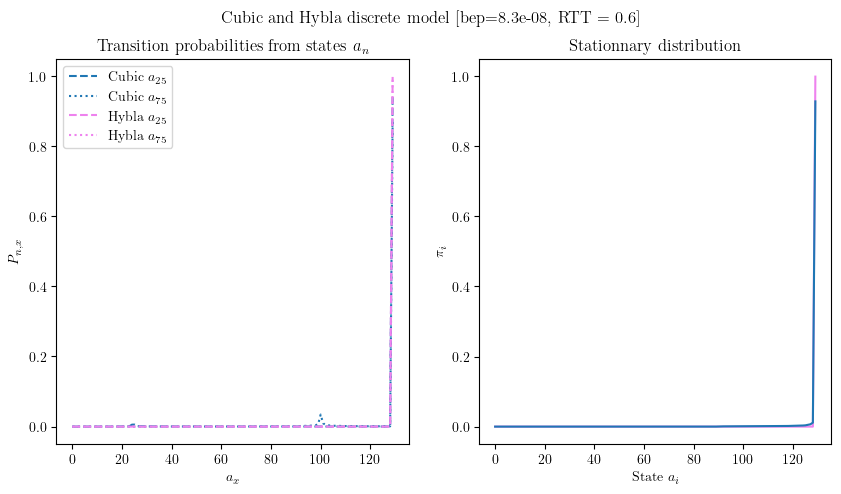

In [12]:
p = 0.001
b = 0.7
rtt = 0.6
wired = CCA_MarkovChain_Hybla_bit(packet_err=p,beta=b,N=130,C =50, RTT_real = rtt, RTT0=0.05)
wired.avg_throughput()
cubic = CCA_MarkovChain_CUBIC_bit(packet_err=p,beta=b,N=130,C =50, RTT_real = rtt)
cubic.avg_throughput()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(cubic.N),cubic.P[25,:],label = "Cubic $a_{25}$",linestyle='--',color='tab:blue')
axs[0].plot(np.arange(cubic.N),cubic.P[100,:],label = "Cubic $a_{75}$",linestyle=':',color='tab:blue')
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = "Hybla $a_{25}$",linestyle='--', color='violet')
axs[0].plot(np.arange(wired.N),wired.P[100,:],label = "Hybla $a_{75}$",linestyle=':', color='violet')
axs[0].set_title(r"Transition probabilities from states $a_n$")
axs[0].set_ylabel(r"$P_{n,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi, label = "Hybla", color='violet')
axs[1].plot(np.arange(cubic.N),cubic.pi, label = "Cubic", color='tab:blue')
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$")
axs[1].set_ylabel(r'$\pi_i$')
fig.suptitle(f"Cubic and Hybla discrete model [bep={round(p/(1500*8),9)}, RTT = {rtt}]")
plt.show()